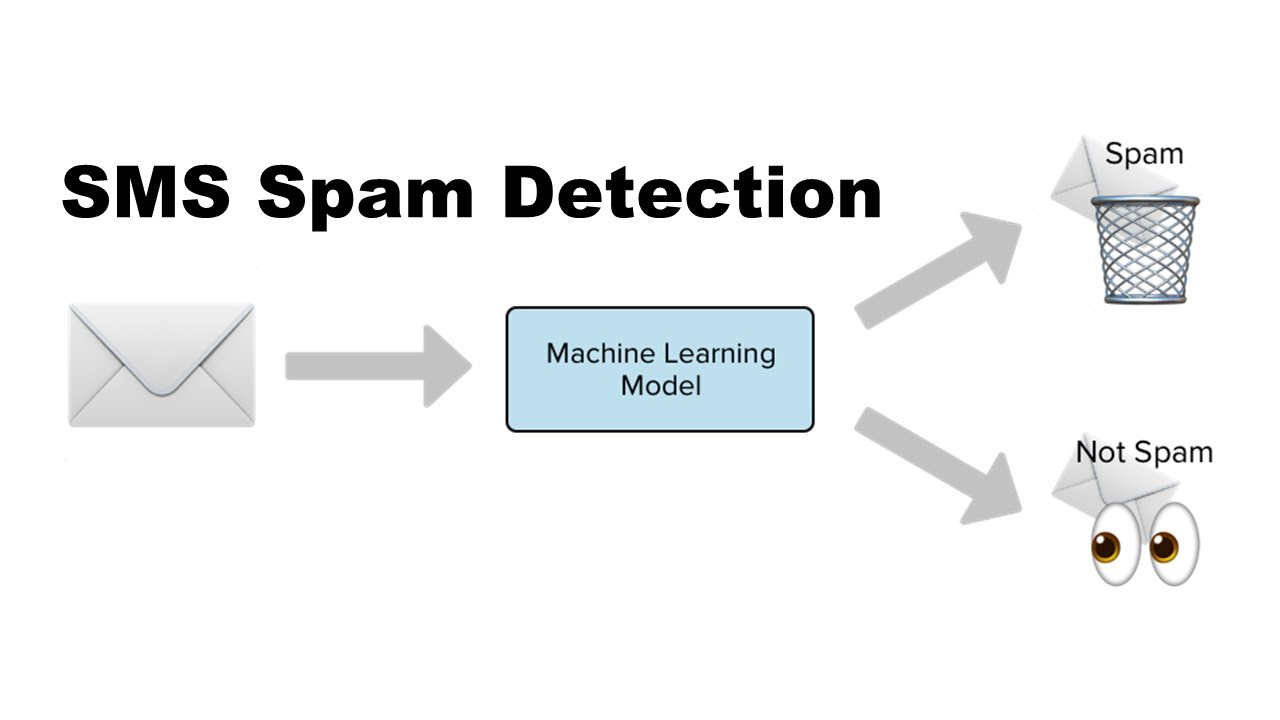

In [29]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/SMS Spam Collection.jpg",height=500,width=900))

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re            #regular expression used for removing special charecter
df=pd.read_csv("/content/SMS Spam Collection Dataset.zip",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.shape

(5572, 5)

In [9]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

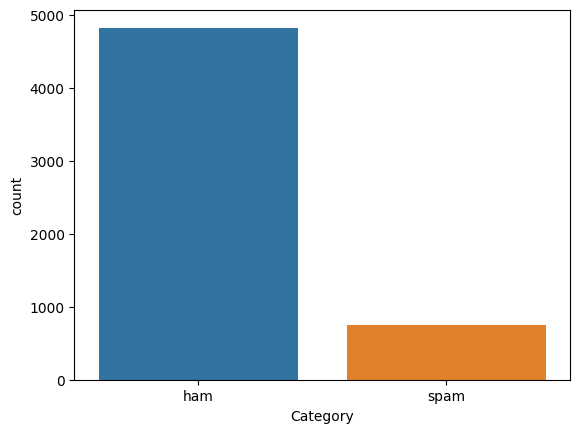

In [ ]:
sns.countplot(x="v1",data=df)

In [ ]:
df.dtypes

Category    object
Message     object
dtype: object

In [10]:
df['v1']=df['v1'].replace({"ham":1,"spam":0})
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,1,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,1,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,1,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,1,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,1,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("'omw-1.4'")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading 'omw-1.4': Package "'omw-1.4'" not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
twitter=df['v2']
twitter

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [14]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=twitter.apply(lambda x :tk.tokenize(x)).apply(lambda  x:" ".join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: v2, Length: 5572, dtype: object

In [15]:
tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-15-9f75934b3399>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: v2, Length: 5572, dtype: object

In [16]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweet.apply(lambda x :[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5567    this is the 2nd time we have tri 2 contact u u...
5568                        will b go to esplanad fr home
5569       piti was in mood for that so ani other suggest
5570    the guy did some bitch but i act like i d be i...
5571                              rofl it true to it name
Name: v2, Length: 5572, dtype: object

In [17]:
#step5:- remove stop word
from nltk.corpus import stopwords
stop=stopwords.words('english')
ss=tweets.apply(lambda x :[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x: " ".join(x))
ss


0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [18]:
#step6:- vectorization(the process of converting data into numerical)

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data=vec.fit_transform(ss)
train_data

<5572x7088 sparse matrix of type '<class 'numpy.float64'>'
	with 46997 stored elements in Compressed Sparse Row format>

In [19]:
print(train_data)

  (0, 6770)	0.19121047784925035
  (0, 1073)	0.346144618268281
  (0, 3063)	0.16244276333486443
  (0, 1844)	0.2924243722790815
  (0, 1613)	0.33043245355168216
  (0, 3781)	0.2924243722790815
  (0, 6939)	0.23204476278504196
  (0, 3101)	0.19085658528698457
  (0, 1615)	0.2924243722790815
  (0, 4639)	0.1654318473608299
  (0, 1259)	0.25890488577964177
  (0, 2048)	0.26806517933839086
  (0, 4940)	0.2363548636164407
  (0, 3672)	0.346144618268281
  (0, 3024)	0.13893903485322898
  (1, 4637)	0.5647537939557097
  (1, 6863)	0.4459451111953121
  (1, 3639)	0.47451057922863127
  (1, 3812)	0.4218684931830353
  (1, 4611)	0.2811632882742994
  (2, 380)	0.14987364227852748
  (2, 79)	0.23443649351161072
  (2, 1144)	0.1668930018894862
  (2, 5195)	0.1612334732367293
  (2, 6502)	0.12376675392987241
  :	:
  (5567, 4639)	0.17355769525728884
  (5568, 2576)	0.664927791756591
  (5568, 2856)	0.573800673296941
  (5568, 3306)	0.3744001135699869
  (5568, 3024)	0.2974027135593451
  (5569, 4891)	0.6038288697475673
  (5569, 

In [20]:
train_data.shape

(5572, 7088)

In [22]:
y=df['v1'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<3900x7088 sparse matrix of type '<class 'numpy.float64'>'
	with 32804 stored elements in Compressed Sparse Row format>

In [24]:
x_test

<1672x7088 sparse matrix of type '<class 'numpy.float64'>'
	with 14193 stored elements in Compressed Sparse Row format>

In [25]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

In [26]:
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [27]:
from sklearn.naive_bayes import MultinomialNB
navies_model=MultinomialNB()

In [30]:
from sklearn.svm import SVC
svc_model=SVC()

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neighbours_model=KNeighborsClassifier(n_neighbors=5)

[1 1 1 ... 1 1 1]
[[ 162   57]
 [   1 1452]]
0.965311004784689
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       219
           1       0.96      1.00      0.98      1453

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672

****************************************************************************************************


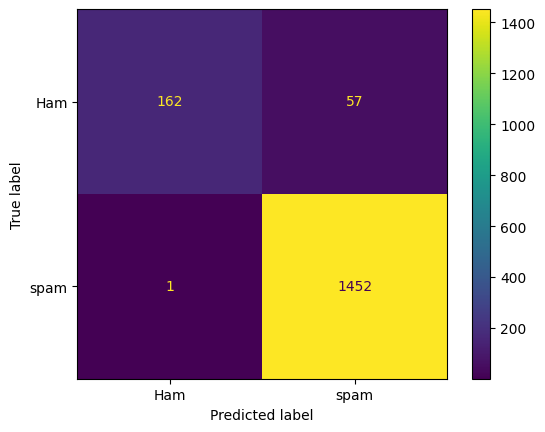

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
navies_model.fit(x_train,y_train)
y_prede=navies_model.predict(x_test)
result=confusion_matrix(y_test,y_prede)
score=accuracy_score(y_test,y_prede)
report=classification_report(y_test,y_prede)
cm=["Ham","spam"]
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
print(y_prede)
print(result)
print(score)
print(report)
print(cmd.plot())
print("*"*100)

[1 1 1 ... 1 1 1]
[[ 162   57]
 [   1 1452]]
0.965311004784689
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       219
           1       0.96      1.00      0.98      1453

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672

****************************************************************************************************


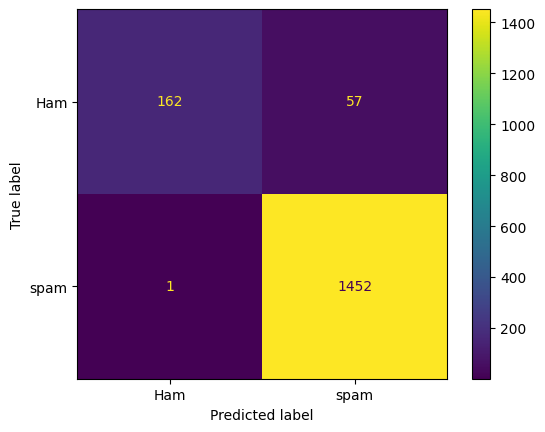

In [37]:
svc_model.fit(x_train,y_train)
y_prede=navies_model.predict(x_test)
result=confusion_matrix(y_test,y_prede)
score=accuracy_score(y_test,y_prede)
report=classification_report(y_test,y_prede)
cm=["Ham","spam"]
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
print(y_prede)
print(result)
print(score)
print(report)
print(cmd.plot())
print("*"*100)

[1 1 1 ... 1 1 1]
[[ 162   57]
 [   1 1452]]
0.965311004784689
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       219
           1       0.96      1.00      0.98      1453

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672

****************************************************************************************************


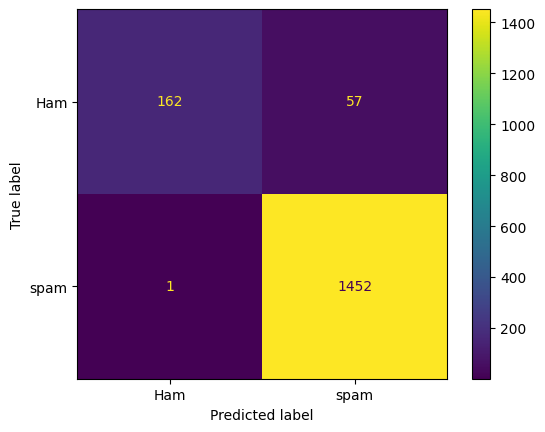

In [38]:
tree_model.fit(x_train,y_train)
y_prede=navies_model.predict(x_test)
result=confusion_matrix(y_test,y_prede)
score=accuracy_score(y_test,y_prede)
report=classification_report(y_test,y_prede)
cm=["Ham","spam"]
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
print(y_prede)
print(result)
print(score)
print(report)
print(cmd.plot())
print("*"*100)

[1 1 1 ... 1 1 1]
[[ 162   57]
 [   1 1452]]
0.965311004784689
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       219
           1       0.96      1.00      0.98      1453

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672

****************************************************************************************************


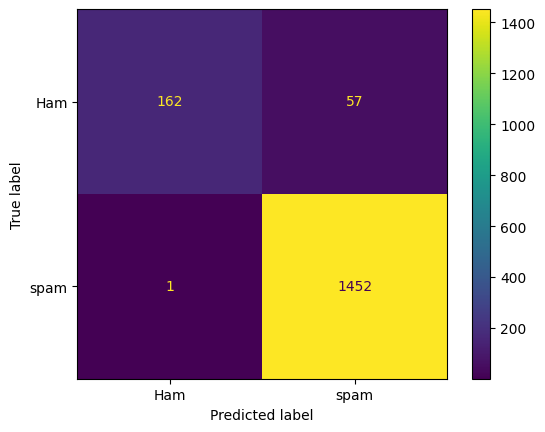

In [39]:
neighbours_model.fit(x_train,y_train)
y_prede=navies_model.predict(x_test)
result=confusion_matrix(y_test,y_prede)
score=accuracy_score(y_test,y_prede)
report=classification_report(y_test,y_prede)
cm=["Ham","spam"]
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
print(y_prede)
print(result)
print(score)
print(report)
print(cmd.plot())
print("*"*100)